# SVM Regression

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading data
df=pd.read_excel('UCI_Real_Estate_Valuation.xlsx')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
#droping ID
df.drop("No",axis=1,inplace = True)

In [5]:
#describe data
df.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Outliers Detection

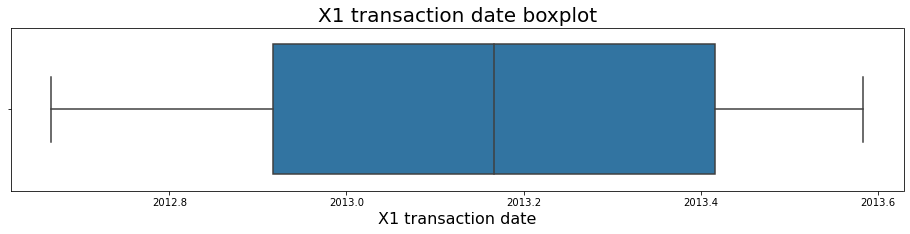

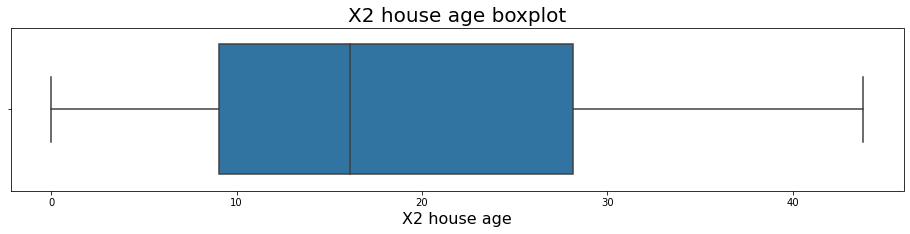

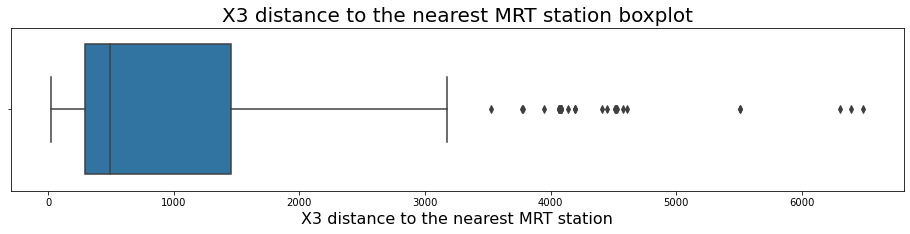

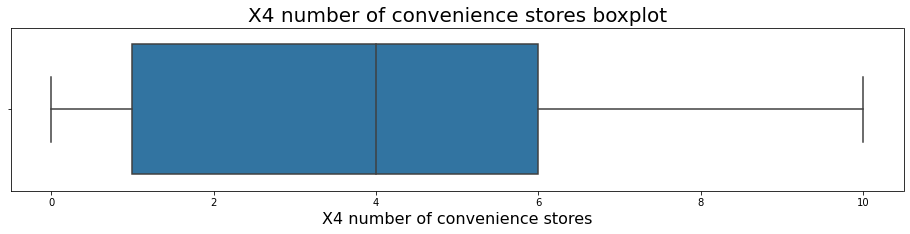

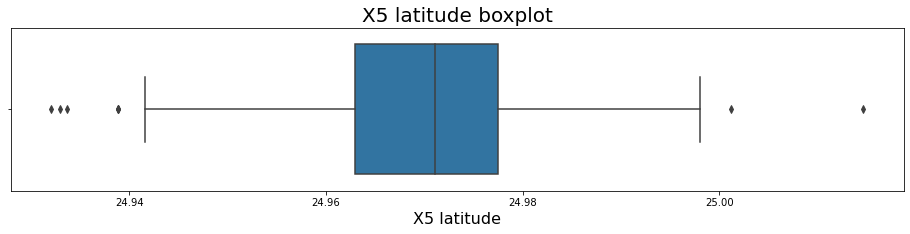

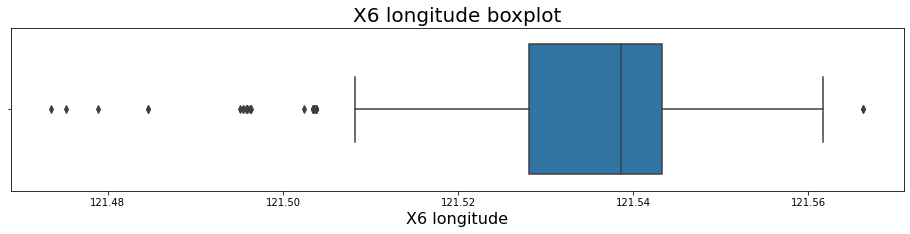

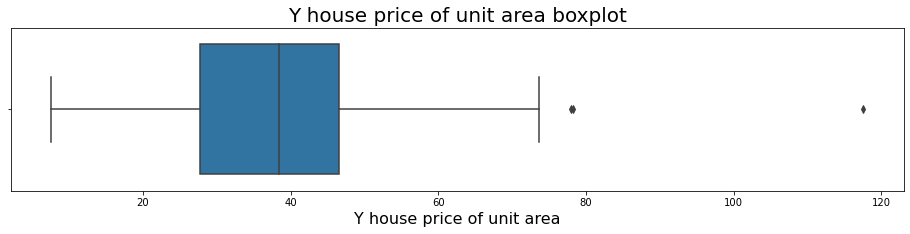

In [6]:
#box plots
for col_name in df:
    plt.figure(figsize=(16, 3))
    sns.boxplot(x=df[col_name])
    plt.title(col_name + " boxplot", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.show()

# Heat Map

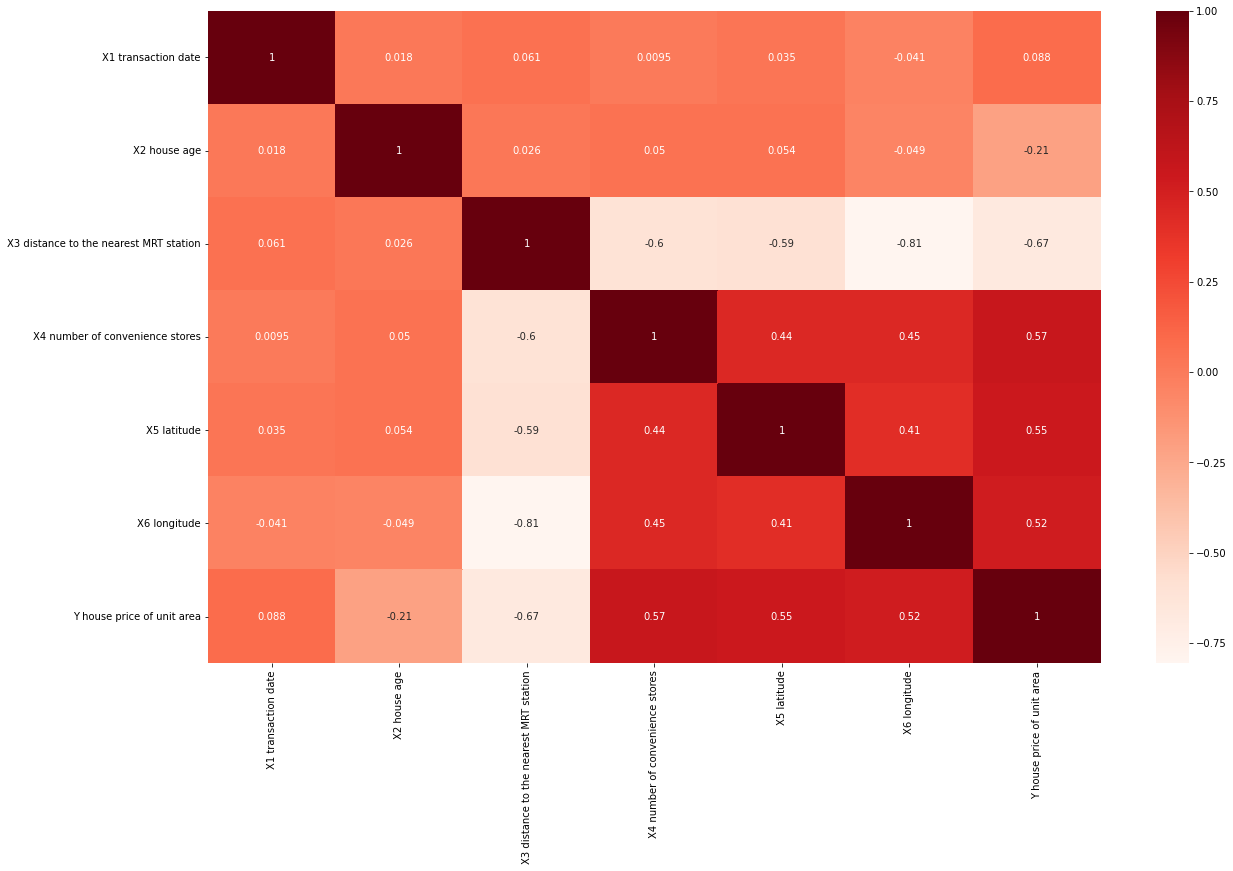

In [7]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),cmap=plt.cm.Reds,annot=True)

# Test Train Split

In [8]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X = df.drop("Y house price of unit area",axis=1)
y = df["Y house price of unit area"]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=109) # 90% training and 10% test

# Scalling Data

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [10]:
#num_vars
num_vars = df.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

num_vars.remove("Y house price of unit area")

#scaling in X_train
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])


In [11]:
#scaling X_test
num_vars = df.select_dtypes(exclude =["object","uint8"]).columns

num_vars = list(num_vars)

num_vars.remove("Y house price of unit area")

X_test[num_vars] = scaler.transform(X_test[num_vars])

In [12]:
X_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
55,-1.101570,1.210184,0.053601,-1.387370,-1.541945,-0.207260
49,-1.691188,1.008828,2.657910,-1.043531,-1.576342,-2.446325
373,-0.217144,-1.565029,-0.635716,-1.043531,0.467488,-0.174969
167,0.962091,0.903773,-0.592123,1.363338,0.409893,0.439853
28,1.256900,0.115857,-0.415332,-0.012016,0.418692,0.301647
...,...,...,...,...,...,...
399,-0.806761,-0.453193,-0.716484,-1.043531,0.380295,-0.223406
141,0.667282,-1.118543,0.363963,-0.355854,0.253906,-1.099786
412,-0.511953,-0.855905,-0.767268,0.331823,-0.177258,0.476019
245,0.962091,-0.908432,-0.351470,0.331823,0.289903,0.958448


# Model Building

## Base Model

In [13]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

In [16]:
y_pred = regressor.predict(X_test)

## Evaluation Model

In [15]:
y_test

70     59.0
232    17.4
382    29.3
178    36.7
273    29.3
1      42.2
79     26.5
381    47.3
25     27.0
338    36.3
311    42.2
383    40.3
66     50.7
221    38.5
335    36.5
211    43.5
54     51.7
47     61.5
369    22.8
97     34.6
181    55.9
274    41.0
236    61.9
378    37.4
375    23.8
61     63.2
16     70.1
62     27.7
357    44.9
200    25.5
147    43.2
406    40.5
169    23.5
351    28.6
220    78.3
342    53.5
182    23.6
295    21.8
302    23.2
92     21.8
156    18.3
21     51.6
Name: Y house price of unit area, dtype: float64

In [17]:
y_pred

array([46.62855933, 19.65398202, 21.76148567, 40.97740048, 39.89905517,
       45.28688934, 23.91627154, 48.12954039, 30.53398267, 40.82699607,
       39.88590772, 36.42587727, 48.51089991, 38.06746595, 37.9605682 ,
       42.56901982, 45.52169004, 36.56450401, 26.79053347, 36.55513389,
       48.86734104, 41.81747498, 47.95110919, 39.4758329 , 27.60464118,
       48.47287791, 50.74714204, 25.64822683, 47.51729277, 30.81551875,
       48.11943748, 50.68337529, 28.78539302, 30.47593538, 41.09382773,
       47.50491176, 28.19879618, 25.25642739, 26.47459337, 24.879159  ,
       27.82446755, 48.43168352])

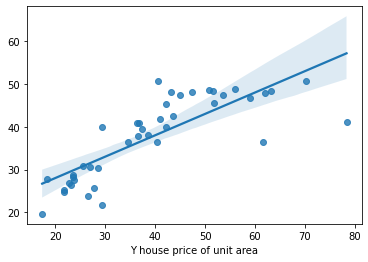

In [19]:
#plot predictions(scaled data)
sns.regplot(y_test,y_pred)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

#test score
r2_score(y_test, y_pred)

0.5987986401120436

## Cross Validation(Grid Search)

In [81]:
from sklearn.model_selection import GridSearchCV
  
clf = SVR()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.045, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.049, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.061, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.052, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.055, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.161, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=0.001, kernel=rbf ..................................
[CV] ...... C=0.1, gamma=0.001, kernel=rbf, score=0.008, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.001, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .... C=0.1, gamma=0.0001, kernel=rbf, score=-0.033, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .... C=0.1, gamma=0.0001, kernel=rbf, score=-0.001, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .... C=0.1, gamma=0.0001, kernel=rbf, score=-0.000, total=   0.0s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .... C=0.1, gamma=0.0001, kernel=rbf, score=-0.001, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.282, total=   0.0s
[CV] 

[CV] .......... C=100, gamma=1, kernel=rbf, score=0.532, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .......... C=100, gamma=1, kernel=rbf, score=0.689, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.573, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.783, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.691, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.699, total=   0.0s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=100, gamma=0.1, kernel=rbf, score=0.674, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    2.0s finished


GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [82]:
grid.best_params_

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [83]:
grid.best_score_

0.6839296497691377

## Model With Best Parameters

In [87]:
clf = SVR(C= 100, gamma= 0.1, kernel= 'rbf') # rbf Kernel

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [88]:
#score test
r2_score(y_test, y_pred)

0.6551490735538035

In [89]:
#score train
clf.score(X_train,y_train)

0.756902379227548

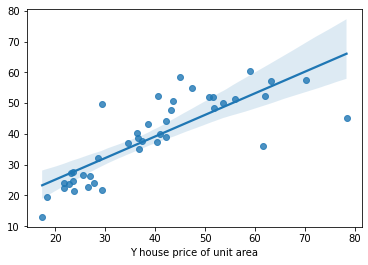

In [90]:
#reg. plot
sns.regplot(y_test,y_pred)